In [14]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue 

## Пункт A

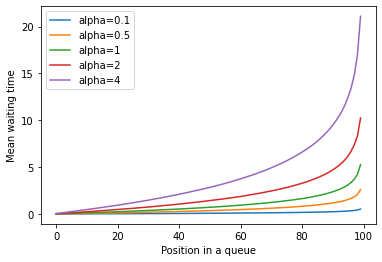

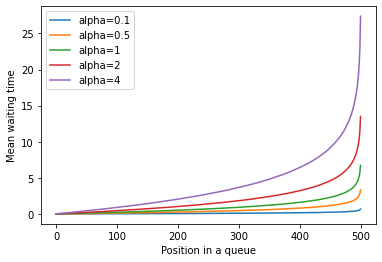

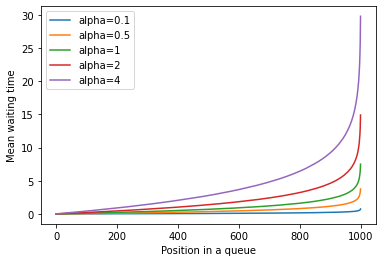

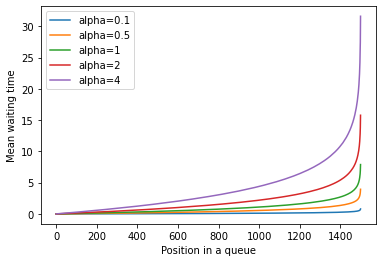

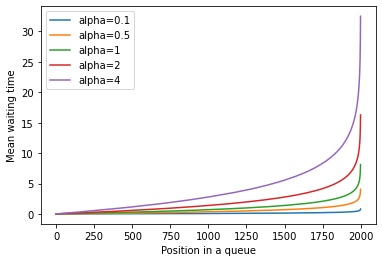

In [15]:
windows = [100, 500, 1000, 1500, 2000] # количество окошек
al = [0.1, 0.5, 1, 2, 4] # параметр
count = 1000 # количество повторов эксперимента

for n in windows:
    for a in al:
        result = np.zeros(n)
        for i in range(count):
            result += np.sort(np.random.exponential(a, n)) # генерируем и сортируем выборку
            
        plt.plot(np.arange(n), result / count, label="alpha={}".format(a))
        plt.xlabel("Position in a queue")
        plt.ylabel("Mean waiting time")
        
    plt.legend()
    plt.show()

 ***Вывод:*** Время ожидания посетителя в очереди экспоненциально зависит от его места.

## Пункт B

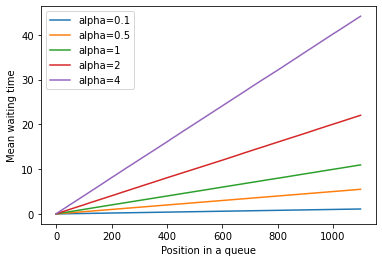

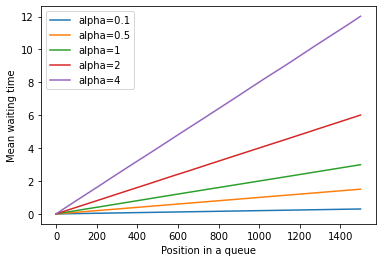

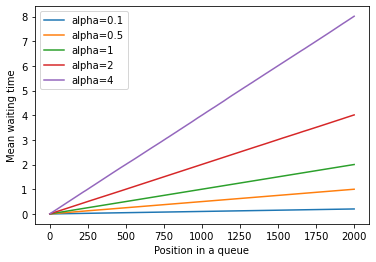

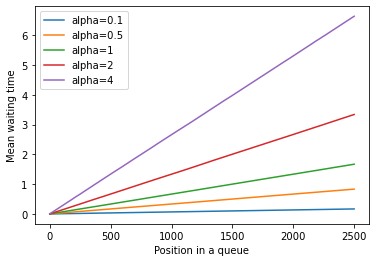

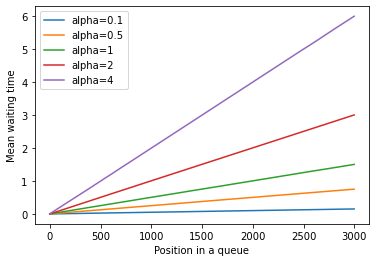

In [16]:
windows = [100, 500, 1000, 1500, 2000] # количество окошек
al = [0.1, 0.5, 1, 2, 4] # параметр
count = 100 # количество повторов эксперимента

def recreating_queue(a, n, queue_len):
    first = np.random.exponential(a, n)
    heap = PriorityQueue()
    
    for i in first:
        heap.put(i) # складываем в кучу
    answer = np.zeros(queue_len)
    
    for i in range(answer.size):
        answer[i] = heap.get() # достаем минимум
        heap.put(np.random.exponential(a) + answer[i]) # минимум + сгенерированный
        
    return answer

for n in windows:
    for a in al:
        queue_len = n + 1000 # увеличеваем размер очереди
        result = np.zeros(queue_len)
        
        for i in range(count):
            result += recreating_queue(a, n, queue_len)

        plt.plot(np.arange(queue_len), result / count, label="alpha={}".format(a))
        plt.xlabel("Position in a queue")
        plt.ylabel("Mean waiting time")
        
    plt.legend()
    plt.show()

***Вывод:*** Время ожидания посетителя в очереди линейно зависит от его места.